In [108]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set(style='ticks')

from pickle import load

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from scipy.stats import spearmanr
from matplotlib.pyplot import figure

In [109]:
#Read ANN data and model                                                                                        
activation_function='tanh';train_size=60
                                                                                  
file_model='NN_model_' + activation_function + '_train_' +str(train_size)+ '_NREP_10_data' + '.csv'
model_d='ANN_BMS/Data/' + file_model
d=pd.read_csv(model_d)

n=2
dn=d[d['rep']==n]
dn.set_index('Unnamed: 0', inplace=True)
dn.index.name = None
dn=dn.reset_index(drop=True)

print(dn)

      x1         y  rep    ymodel
0  -1.95  0.688229  2.0  0.688443
1  -1.90  0.675937  2.0  0.675810
2  -1.85  0.663654  2.0  0.663349
3  -1.80  0.651427  2.0  0.651072
4  -1.75  0.639311  2.0  0.638994
..   ...       ...  ...       ...
75  1.80  0.416738  2.0  0.299993
76  1.85  0.429237  2.0  0.300073
77  1.90  0.441836  2.0  0.300138
78  1.95  0.454457  2.0  0.300191
79  2.00  0.467024  2.0  0.300234

[80 rows x 4 columns]


In [110]:
import sys
sys.path.append('machine-scientist/')
sys.path.append('machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par


VARS = ['x1',]
x = dn[[c for c in VARS]].copy()
y = dn.y


In [111]:
#Read BMS model
file_BMS='test_ANN.%s.csv' % n
model_BMS='MSTraces/' + file_BMS
db = pd.read_csv(model_BMS, sep=';', header=None, names=['t', 'H', 'expr', 'parvals', 'kk1', 'kk2','kk3'])

import ast
minrow = db[db.H == max(db.H)].iloc[0]
minH, minexpr, minparvals = minrow.H, minrow.expr, ast.literal_eval(minrow.parvals)

print(minH)
print(minexpr)
print(minparvals)

prior_par = read_prior_par('machine-scientist/Prior/final_prior_param_sq.named_equations.nv1.np10.2017-10-18 18:07:35.089658.dat')

t = Tree(
    variables=list(x.columns),
    parameters=['a%d' % i for i in range(10)],
    x=x, y=y,
    prior_par=prior_par,
    max_size=200,
    from_string=minexpr,
)
t.set_par_values(deepcopy(minparvals))

44.1277036187334
((_a5_ * (_a8_ * ((_a2_ * _a7_) / _a7_))) + (_a9_ * ((_a0_ * cos(((_a2_ + -(_a5_)) + (x1 * sin((_a8_ / _a6_)))))) + sin((((((_a1_ ** _a8_) + _a7_) + ((_a4_ * pow3((pow3((pow2(x1) / pow2((_a2_ + _a2_)))) * (_a6_ ** ((_a2_ + (_a6_ * (_a9_ / _a7_))) + _a2_))))) ** _a0_)) ** (_a2_ * ((_a8_ ** _a2_) * (x1 * (_a8_ * _a5_))))) * ((_a9_ + _a9_) + (((_a2_ / _a3_) * (((x1 / _a3_) * _a2_) + _a7_)) / _a1_)))))))
{'d0': {'_a0_': 3.0352113365897, '_a1_': 6.448838154756122e+126, '_a2_': 5.882037030788134, '_a3_': 2.610863584369599, '_a4_': 1.4345103333771323e+150, '_a5_': 0.285311120467406, '_a6_': 0.04802710150963081, '_a7_': 1.7916215711426516e+127, '_a8_': 0.3442136893681643, '_a9_': -0.1487110359466366}}


      x1         y  rep    ymodel
0  -1.95  0.688229  2.0  0.688443
1  -1.90  0.675937  2.0  0.675810
2  -1.85  0.663654  2.0  0.663349
3  -1.80  0.651427  2.0  0.651072
4  -1.75  0.639311  2.0  0.638994
..   ...       ...  ...       ...
75  1.80  0.416738  2.0  0.299993
76  1.85  0.429237  2.0  0.300073
77  1.90  0.441836  2.0  0.300138
78  1.95  0.454457  2.0  0.300191
79  2.00  0.467024  2.0  0.300234

[80 rows x 4 columns]
      x1
0  -1.95
1  -1.90
2  -1.85
3  -1.80
4  -1.75
..   ...
75  1.80
76  1.85
77  1.90
78  1.95
79  2.00

[80 rows x 1 columns]
      x1         y  rep    ymodel      ybms
0  -1.95  0.688229  2.0  0.688443  0.692471
1  -1.90  0.675937  2.0  0.675810  0.678424
2  -1.85  0.663654  2.0  0.663349  0.664568
3  -1.80  0.651427  2.0  0.651072  0.650983
4  -1.75  0.639311  2.0  0.638994  0.637749
..   ...       ...  ...       ...       ...
75  1.80  0.416738  2.0  0.299993  0.089617
76  1.85  0.429237  2.0  0.300073  0.116204
77  1.90  0.441836  2.0  0.300138  0.21846

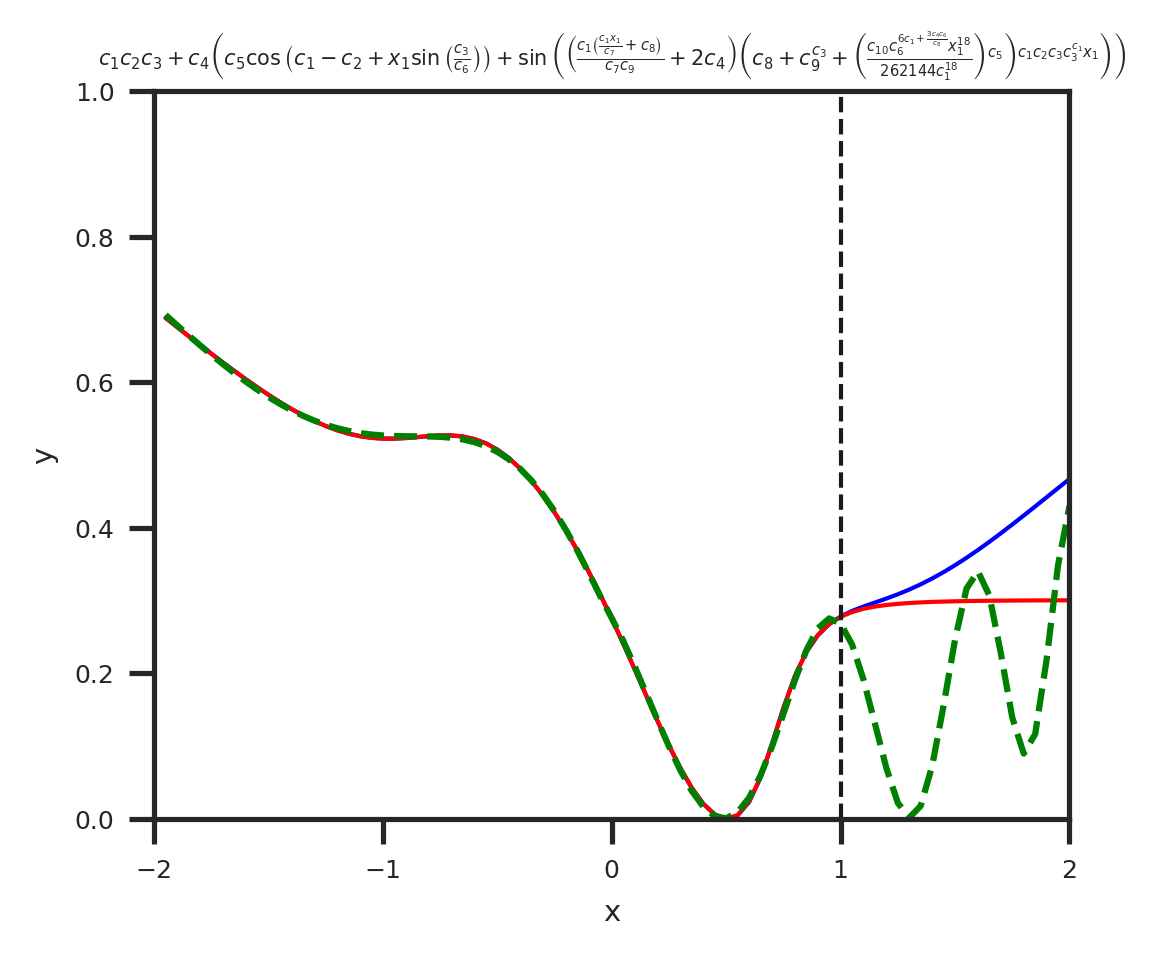

In [112]:
train_border=dn.loc[train_size-1]['x1']

dplot = deepcopy(dn)
print(dplot)
dplot['ybms'] = t.predict(x)
print(x)
print(dplot)
#dplot['ydelta'] = dplot['ymodel'] - dplot['y']

#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 10*cm; height=8*cm

Extensions=['.png', '.pdf']

#Fonts and sizes                                                                                    
size_axis=7;size_ticks=6;size_title=5
line_w=1;marker_s=3 #width and marker size                                                          

#fig = plt.figure(figsize=(width, height))
fig=figure(figsize=(width,height), dpi=300)                                                        

plt.plot(dn['x1'], dn['y'],linewidth=line_w, color='blue',label='observed')                                                      
plt.plot(dn['x1'], dn['ymodel'],linewidth=line_w, color='red', label='ann model')   
plt.plot(dplot.x1, dplot.ybms, color='green', linestyle='--',label='bms')
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

plt.title('$%s$' % t.latex(),fontsize=size_title)
plt.xlabel('x',fontsize=size_axis);plt.ylabel('y',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)

plt.xlim(-2,2);plt.ylim(0,1)                                               

Name_figure='BMS_NN_observed_' + str(n)
for ext in Extensions:
        plt.savefig(Name_figure +ext,dpi=300)

plt.show()
